In [1]:
import requests
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
from dotenv import load_dotenv

In [2]:
load_dotenv() # Get the .env file

blockchain_url = 'https://api.blockchain.info/charts/hash-rate' # Blockchain API endpoint we will be using

In [3]:
params = {
    "timespan": "all",        # todo el histórico
    "format": "json",
    "rollingAverage": "7days",         # o "csv" 
    "sampled": "false"        # para que no reduzca datapoints
}
response = requests.get(url=blockchain_url, params=params) # url + specified params
response.raise_for_status()
data = response.json() # Parse the JSON

In [4]:
print(data)

{'status': 'ok', 'name': 'Hash Rate', 'unit': 'Hash Rate TH/s', 'period': 'day', 'description': 'The estimated number of tera hashes per second (trillions of hashes per second) the Bitcoin network is performing.', 'values': [{'x': 1231545600, 'y': 1.0652200634920637e-07}, {'x': 1231632000, 'y': 3.195660190476193e-07}, {'x': 1231718400, 'y': 1.0723215305820108e-06}, {'x': 1231804800, 'y': 1.7043521015873019e-06}, {'x': 1231891200, 'y': 2.521020816931218e-06}, {'x': 1231977600, 'y': 3.415805670264551e-06}, {'x': 1232064000, 'y': 4.3176919906878315e-06}, {'x': 1232150400, 'y': 5.042041633862435e-06}, {'x': 1232236800, 'y': 5.58885459978836e-06}, {'x': 1232323200, 'y': 5.5533472643386245e-06}, {'x': 1232409600, 'y': 5.766391277037037e-06}, {'x': 1232496000, 'y': 5.7734927441269844e-06}, {'x': 1232582400, 'y': 5.681173671957674e-06}, {'x': 1232668800, 'y': 5.311897383280425e-06}, {'x': 1232755200, 'y': 4.9639254958730155e-06}, {'x': 1232841600, 'y': 5.610159001058201e-06}, {'x': 1232928000,

In [11]:
values = data['values']

df = pd.DataFrame(values)

#df['date'] = pd.to_datetime(df['x'], unit='s')     # Convert to date type

# Convert timestamp to human-readable date
df["date"] = pd.to_datetime(df["x"], unit="s")

#df['y'] = pd.to_numeric(df['y'], errors='coerce')  # Convert tu numeric type

# Keep only date and hashrate
df = df[["date", "y"]]
df.rename(columns={"y": "hashrate"}, inplace=True)

df.to_csv("Hashrate.csv")

print("Data saved to bitcoin_hashrate.csv")
print(df.head())

Data saved to bitcoin_hashrate.csv
        date      hashrate
0 2009-01-10  1.065220e-07
1 2009-01-11  3.195660e-07
2 2009-01-12  1.072322e-06
3 2009-01-13  1.704352e-06
4 2009-01-14  2.521021e-06


In [6]:
print(df['x'])

0       1231545600
1       1231632000
2       1231718400
3       1231804800
4       1231891200
           ...    
6071    1756080000
6072    1756166400
6073    1756252800
6074    1756339200
6075    1756425600
Name: x, Length: 6076, dtype: int64


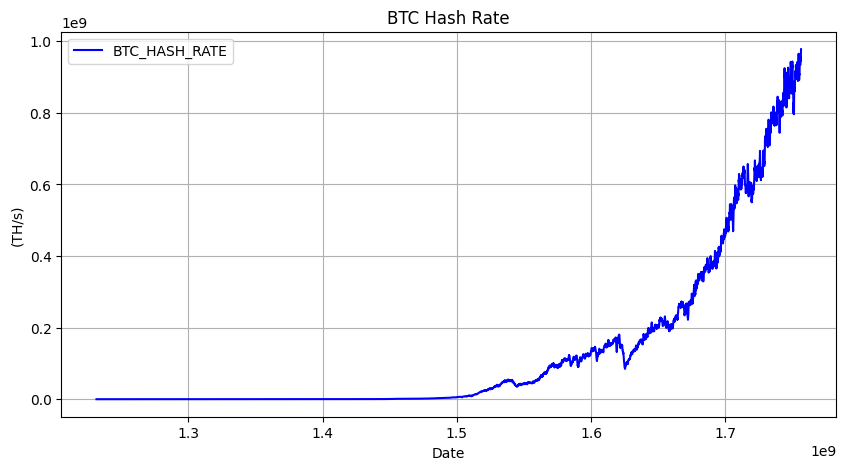

In [7]:
plt.figure(figsize=(10,5))
plt.plot(df['x'], df['y'], label='BTC_HASH_RATE', color='blue')

plt.title('BTC Hash Rate')
plt.xlabel('Date')
plt.ylabel('(TH/s)')
plt.legend()
plt.grid(True)
plt.show()